In [1]:
%matplotlib inline
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
users=[]
with open('../../hduser1/Yelp/user.json') as json_file:
    for line in json_file:
        users.append(json.loads(line))
user_df = pd.DataFrame(users)

In [3]:
user_df.head(1)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,elite,fans,friends,funny,name,review_count,type,useful,user_id,yelping_since
0,3.59,4192,79,4192,3904,19,305,4705,1347,2617,...,"[2017, 2015, 2016, 2014, 2011, 2013, 2012]",298,"[iJg9ekPzF9lkMuvjKYX6uA, ctWAuzS04Xu0lke2Rop4l...",12316,Rob,761,user,18456,EZmocAborM6z66rTzeZxzQ,2009-09-12


In [4]:
relevantUser = user_df.ix[[i != ['None'] for i in user_df['elite']]]

In [5]:
relevantUser.head(1)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,elite,fans,friends,funny,name,review_count,type,useful,user_id,yelping_since
0,3.59,4192,79,4192,3904,19,305,4705,1347,2617,...,"[2017, 2015, 2016, 2014, 2011, 2013, 2012]",298,"[iJg9ekPzF9lkMuvjKYX6uA, ctWAuzS04Xu0lke2Rop4l...",12316,Rob,761,user,18456,EZmocAborM6z66rTzeZxzQ,2009-09-12


In [6]:
oldest = '2017'
for i in relevantUser['elite']:
    for j in i:
        if j < oldest:
            oldest = j
oldest

u'2005'

In [7]:
print("number of users: {}").format(relevantUser.shape[0])

number of users: 49704


When considering the elite status, define the earliest time of observation as the yelp-since + 1 to 2016

In [8]:
relevantUser['elite'][6]

[u'2012', u'2013']

In [9]:
def getStatus(i):
    user = relevantUser.iloc[i]
    first = int(user['yelping_since'].split('-')[0]) + 1
    duration = 2017 - first
    slack = []
    elite = [] 
    potential = []
    non = []
    for i in range(duration):
        currentY = str(first + i) in user['elite']
        nextY = str(first + i + 1) in user['elite']

        if currentY and nextY:
            elite.append(str(first + i))
        elif currentY and not nextY:
            slack.append(str(first + i))
        elif not currentY and nextY:
            potential.append(str(first + i))
        elif not currentY and not nextY:
            non.append(str(first + i))
    return elite, non, potential, slack

In [10]:
getStatus(9)

(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
 ['2007'],
 ['2008'],
 [])

In [11]:
relevantUser['yelping_since'][6]

u'2011-06-09'

In [12]:
relevantUser.tail(1)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,elite,fans,friends,funny,name,review_count,type,useful,user_id,yelping_since
1025494,3.73,2,0,2,4,1,2,4,1,1,...,"[2013, 2012]",1,"[OMoBzr4FhDkk7yV8zYtmiw, 4Y81J2Tdq5XAnkeYmCZ2o...",124,Glenn,81,user,132,9-2iTs5ylwCpp1XTynz31g,2012-01-08


In [13]:
status_period = []
for i in range(relevantUser.shape[0]):
    data = {}
    data['user_id'] = relevantUser.iloc[i]['user_id']
    e, n, p, s = getStatus(i)
    data['elite_period'] = e
    data['non-elite_period'] = n
    data['potential_period'] = p
    data['slack_period'] = s
    status_period.append(data)

In [14]:
status_df = pd.DataFrame(status_period)

In [15]:
count = []
for i in range(status_df.shape[0]):
    user = status_df.iloc[i]
    if len(user['potential_period']) != 0 and len(user['slack_period']) != 0\
    and len(user['elite_period']) != 0 and len(user['non-elite_period']) != 0:
        count.append(i)

In [16]:
status_df.iloc[count].head(15)

,elite_period,non-elite_period,potential_period,slack_period,user_id
11,[2014],"[2011, 2012, 2016]",[2013],[2015],0wBTSc0i-QFVDa_uRLzoZg
21,[2014],"[2012, 2016]",[2013],[2015],UrOofvcBl0gAbKPAEaj83A
38,"[2012, 2013, 2014, 2015]",[2010],[2011],[2016],zKFiBqSYgVVmjKwhKsxX7Q
46,"[2011, 2012, 2013, 2014, 2015]","[2008, 2009]",[2010],[2016],72s2b4tegZYAV3R0gFzLUQ
47,[2008],"[2010, 2011, 2012, 2013, 2016]",[2014],"[2009, 2015]",hh-RcRXai0PTQ8tPCXNi7A
56,[2010],"[2012, 2013, 2014, 2015, 2016]",[2009],[2011],6DbvYyAvTtXTmVOAG32Djw
58,[2012],"[2014, 2015, 2016]",[2011],[2013],3vYsjC90S80legSDDTmqcA
69,[2015],[2013],[2014],[2016],zk5ao2F3zJQOXRpSTpP6tA
72,"[2012, 2013]","[2010, 2015, 2016]",[2011],[2014],GABWrw5Et9jubriKwMUDbw
74,[2012],[2016],[2014],"[2013, 2015]",aU8saUu9QhSFvnYeUsxO-A


In [17]:
len(count)

9388

In [18]:
review=[]
with open('../../hduser1/Yelp/review.json') as json_file:
    for line in json_file:
        review.append(json.loads(line))
review_df = pd.DataFrame(review)

In [19]:
sample = review_df.ix[review_df['user_id'] == '0wBTSc0i-QFVDa_uRLzoZg']

In [20]:
sample.head(1)

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
11811,FmZl3emoVxmZVvSsU2l0aQ,0,2014-12-25,0,8TMR9ows7s_BAod40Zv-rQ,4,Sale! 1.00 fleece hats and 2.00 fleece scarves...,review,0,0wBTSc0i-QFVDa_uRLzoZg


In [21]:
def plotData(Uid):
    sample = review_df.ix[review_df['user_id'] == Uid]
    plot = {}
    star = {}
    word = {}
    for i in range(sample.shape[0]):
        date = sample.iloc[i]['date'].split('-')
        year = date[0]    
        month = date[1]
        plot[(int(year),int(month))] = 0

    x = plot.keys()
    x.sort()
    fst = x[0][0]
    lst = x[len(x)-1][0]

    for i in range(int(lst) - int(fst) + 1):
        for j in range(12):
            plot[(int(fst) + i, j+1)] = 0
            star[(int(fst) + i, j+1)] = 0
            word[(int(fst) + i, j+1)] = 0

    data = []
    stars = []
    avg = []
    time = []
    words = []
    avg_words = []

    import datetime
    for i in range(sample.shape[0]):
        date = sample.iloc[i]['date'].split('-')
        year = date[0]    
        month = date[1]
        plot[(int(year),int(month))] += 1
        star[(int(year),int(month))] += sample.iloc[i]['stars']
        word[(int(year),int(month))] += len(sample.iloc[i]['text'].split(' '))

    for i in range(int(lst) - int(fst) + 1):
        for j in range(12):
            data.append(plot[(int(fst) + i, j+1)])
            stars.append(star[(int(fst) + i, j+1)])
            words.append(word[(int(fst) + i, j+1)])
            if plot[(int(fst) + i, j+1)] != 0:
                avg.append(float(star[(int(fst) + i, j+1)]) / float(plot[(int(fst) + i, j+1)]))
                avg_words.append(float(word[(int(fst) + i, j+1)]) / float(plot[(int(fst) + i, j+1)]))
            else:
                avg.append(0)
                avg_words.append(0)
            time.append(datetime.datetime(int(fst) + i, j+1, 1))
    return time, data, stars, avg, words, avg_words

# plt.plot(time,stars)
# plt.plot(time,data)
# plt.plot(time,avg)
# plt.plot(time, words)
# plt.plot(time, avg_words)

In [22]:
t,d,s,a,w,a_w = plotData('0wBTSc0i-QFVDa_uRLzoZg')

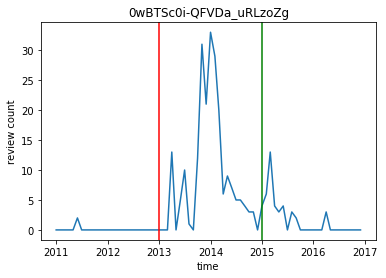

In [33]:
plt.xlabel('time')
plt.ylabel('review count')
plt.title('0wBTSc0i-QFVDa_uRLzoZg')
plt.plot(t,d)
potential = sample_data.ix[sample_data['user_id'] == '0wBTSc0i-QFVDa_uRLzoZg']['potential_period'].values
slack = sample_data.ix[sample_data['user_id'] == '0wBTSc0i-QFVDa_uRLzoZg']['slack_period'].values
for i in potential[0]:
    plt.axvline(x = datetime.datetime(int(i),1,1), color = 'r')
for i in slack[0]:
    plt.axvline(x = datetime.datetime(int(i),1,1), color = 'g')

array([['2011']], dtype=object)

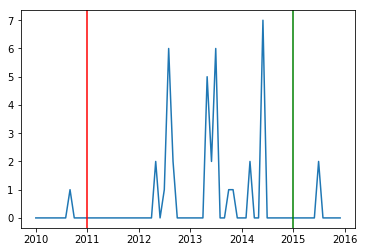

In [27]:
import datetime
t,d,s,a,w,a_w = plotData('uIB8qFzG5E3PUGfiCiUmqg')
plt.xlabel('time')
plt.ylabel('review count')
plt.title('uIB8qFzG5E3PUGfiCiUmqg')
plt.close()
plt.plot(t,d)
potential = sample_data.ix[sample_data['user_id'] == 'uIB8qFzG5E3PUGfiCiUmqg']['potential_period'].values
slack = sample_data.ix[sample_data['user_id'] == 'uIB8qFzG5E3PUGfiCiUmqg']['slack_period'].values
for i in potential[0]:
    plt.axvline(x = datetime.datetime(int(i),1,1), color = 'r')
for i in slack[0]:
    plt.axvline(x = datetime.datetime(int(i),1,1), color = 'g')

In [29]:
sample_data.ix[sample_data['user_id'] == 'aU8saUu9QhSFvnYeUsxO-A']['slack_period'].values[0]

['2013', '2015']

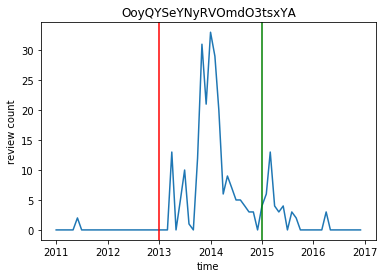

In [36]:
sample_data = status_df.iloc[count]
for i in range(50):
    t = []
    d = []
    s = [] 
    a = []
    w = []
    a_w = []
    u_id = sample_data.iloc[i]['user_id']
    potential = sample_data.ix[sample_data['user_id'] == u_id]['potential_period'].values
    slack = sample_data.ix[sample_data['user_id'] == u_id]['slack_period'].values

    t,d,s,a,w,a_w = plotData(u_id)
    plt.close()
    plt.xlabel('time')
    plt.ylabel('review count')
    plt.title(u_id)
    plt.plot(t,d)
    for j in potential[0]:
        plt.axvline(x = datetime.datetime(int(j),1,1), color = 'r')
    for k in slack[0]:
        plt.axvline(x = datetime.datetime(int(k),1,1), color = 'g')
    
    plt.savefig('images/'+ str(i) +'.png')